<h1 align='center'>Data collection from IMDB</h1>

We downloaded a list of movie plots from the Internet Movie Database (IMDB). We parse the data and collect in a data frame.

<hr>

In [1]:
import pandas as pd
import numpy as np
import urllib2 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# TODO: download from URL
dropbox = "/Users/mr/Dropbox/moviemeta/"

In [10]:
with open(dropbox + "imdb/plot.list") as f:
    plots = f.readlines()
print len(plots)

6855909


There are almost 7 million lines of text in this data set of plots from movies and TV series. The data will be significantly reduced though, as we will not collect plots of TV series.

In [8]:
plotlist = []
nextMovie = False
plot = []
revplots = []
nextPlot = True
by = False
for line in plots:
    #The titles that start with double quotes are TV shows, exclude them
    if line[:2] == 'MV' and line[4] == '"':
        nextMovie = False
        continue
    if line[:2] == 'MV':
        title = line[4:-1]
        # extract the year from the movie title 
        i = title.find('(')
        j = title.find(')')
        if i > 0 and j > 0:
            year = title[i+1:j]
        nextMovie = True
    if nextMovie == True:
        revplots = []
        #instantiate a dict for the next movie
        movie = {'title':title, 'plots':revplots, 'year':year, 'type':'user plot', 'source':'imdb'}
        plotlist.append(movie)
        nextMovie = False
    if nextPlot == True:
        #instantiate a new plot
        plot = []
    if line[:2] == 'PL':
        #append to plot
        plot.append(line[4:].replace('\n',' '))
        nextPlot = False
        by = False
    if line[:2] == 'BY':
        #we're at the end of a plot, convert to string and append to list of plots for this review
        plotstr = ''.join(plot)
        revplots.append(plotstr.strip()) 
        nextPlot = True
        by = True
    if line[:2] == '--':
        if by == False:  #if there was no 'BY' line we append now
            plotstr = ''.join(plot)
            revplots.append(plotstr.strip())  
        nextPlot = True
        by = False
    

In [59]:
movieplots = pd.DataFrame(data=plotlist, columns=['title','source','year','plots', 'type'])

In [9]:
print movieplots.shape
movieplots.head()

(259028, 5)


,title,source,year,plots,type
0,#1 Cheerleader Camp (2010) (V),imdb,2010,"[""When they're hired to work at a cheerleading...",user plot
1,#1 Serial Killer (2013),imdb,2013,"[""Years of seething rage against the racism he...",user plot
2,#1 at the Apocalypse Box Office (2015),imdb,2015,"['Jules is, self declared, the most useless pe...",user plot
3,#137 (2011),imdb,2011,"['#137 is a SCI/FI thriller about a girl, Marl...",user plot
4,#29 (2012),imdb,2012,"[""In #29, the constant zooming into certain la...",user plot


In [4]:
#movieplots.to_csv(dropbox + "movieplots.csv", index=False)
movieplots = pd.read_csv(dropbox + "movieplots.csv")

In [5]:
def clean_dates(row):
    try:
        row['year'] = int(row['year'])
        return row
    except:
        row['year'] = np.nan
        return row
movieplots = movieplots.apply(clean_dates, axis = 1)

In [6]:
years = sorted(movieplots.year.unique())
print years

[1899.0, 1901.0, 1903.0, 1907.0, 1909.0, 1910.0, 1911.0, 1913.0, 1917.0, 1918.0, 1927.0, 1934.0, 1935.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1949.0, 1951.0, 1952.0, 1954.0, 1960.0, 1961.0, 1969.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1978.0, 1979.0, 1980.0, 1981.0, 1983.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2001.0, 2002.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 30.0, 60.0, 718.0, 1888.0, 1891.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1900.0, 1902.0, 1904.0, 1905.0, 1906.0, 1908.0, 1912.0, 1914.0, 1915.0, 1916.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1936.0, 1937.0, 1938.0, 1939.0, 1948.0, 1950.0, 1953.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1970.0, 1976.0, 1977.0, 1982.0, 1984.0,

## Data distribution

Let's have a look at our data and see how it is distributed over the years

In [6]:
years = range (1888, 2015)
movie_counts = dict.fromkeys(years)
for year in years:
    count = sum(movieplots['year'] == year)
    movie_counts[year] = count

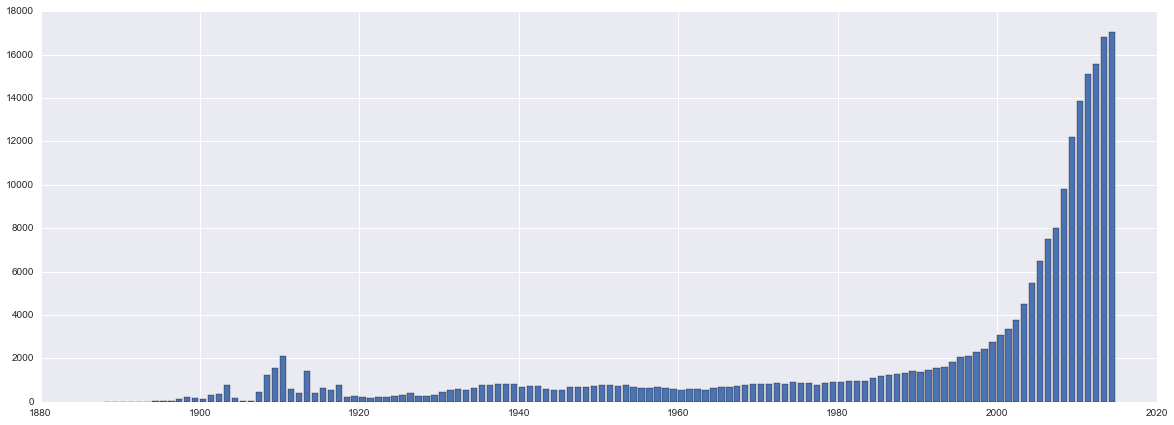

In [8]:
plt.figure(figsize=(20,7))
plt.bar(movie_counts.keys(), movie_counts.values(), color=sns.color_palette()[0])
plt.show()

Our data isn't exactly evenly distributed over time. The data of appr. the last decade accounts for about half of all the data we have. We must bare that in mind when we make analasis over time.

In [9]:
print len(movieplots)
print len(movieplots[movieplots['year'] > 2005])

259028
132914
